# Déjame escuchar la música

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Descripción de los datos](#data_review)
    * [Conclusiones](#data_review_conclusions)
* [Etapa 2. Preprocesamiento de datos](#data_preprocessing)
    * [2.1 Estilo del encabezado](#header_style)
    * [2.2 Valores ausentes](#missing_values)
    * [2.3 Duplicados](#duplicates)
    * [2.4 Conclusiones](#data_preprocessing_conclusions)
* [Etapa 3. Prueba de hipótesis](#hypothesis)
    * [3.1 Hipótesis 1: actividad de los usuarios y las usuarias en las dos ciudades](#activity)
* [Conclusiones](#end)

## Introducción <a id='intro'></a>
analizar datos para extraer información valiosa y tomar decisiones basadas en ellos. Esto implica diferentes etapas, como la descripción general de los datos, el preprocesamiento y la prueba de hipótesis.

Siempre que investigamos, necesitamos formular hipótesis que después podamos probar. A veces aceptamos estas hipótesis; otras veces, las rechazamos. Para tomar las decisiones correctas, una empresa debe ser capaz de entender si está haciendo las suposiciones correctas.

En este proyecto, compararás las preferencias musicales de las ciudades de Springfield y Shelbyville. Estudiarás datos reales de transmisión de música online para probar la hipótesis a continuación y comparar el comportamiento de los usuarios y las usuarias de estas dos ciudades.

### Objetivo:
Prueba la hipótesis:
1. La actividad de los usuarios y las usuarias difiere según el día de la semana y dependiendo de la ciudad.


### Etapas
Los datos del comportamiento del usuario se almacenan en el archivo `/datasets/music_project_en.csv`. No hay ninguna información sobre la calidad de los datos, así que necesitarás examinarlos antes de probar la hipótesis.

Primero, evaluarás la calidad de los datos y verás si los problemas son significativos. Entonces, durante el preprocesamiento de datos, tomarás en cuenta los problemas más críticos.

Tu proyecto consistirá en tres etapas:
 1. Descripción de los datos.
 2. Preprocesamiento de datos.
 3. Prueba de hipótesis.








## Etapa 1. Descripción de los datos <a id='data_review'></a>

Abre los datos y examínalos.

In [1]:
# Importar pandas
import pandas as pd 


In [2]:
# Leer el archivo y almacenarlo en df
df = pd.read_csv("music_project_en (1).csv")

In [3]:
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday
5,842029A1,Chains,Obladaet,rusrap,Shelbyville,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Springfield,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Springfield,20:47:49,Wednesday
8,8FA1D3BE,L’estate,Julia Dalia,ruspop,Springfield,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Shelbyville,21:20:49,Wednesday


In [4]:
# Obtener la información general sobre nuestros datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63736 non-null  object
 2   artist    57512 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


In [5]:
df.isnull().sum()

  userID       0
Track       1343
artist      7567
genre       1198
  City         0
time           0
Day            0
dtype: int64

Estas son nuestras observaciones sobre la tabla. Contiene siete columnas. Almacenan los mismos tipos de datos: `object`.

Según la documentación:
- `' userID'`: identificador del usuario o la usuaria;
- `'Track'`: título de la canción;
- `'artist'`: nombre del artista;
- `'genre'`: género de la pista;
- `'City'`: ciudad del usuario o la usuaria;
- `'time'`: la hora exacta en la que se reprodujo la canción;
- `'Day'`: día de la semana.






Identificamos que Algunos encabezados están en mayúsculas, otros en minúsculas.
Hay espacios en algunos encabezados.
 

### Escribe observaciones de tu parte. Estas son algunas de las preguntas que pueden ser útiles: <a id='data_review_conclusions'></a>

`1.   ¿Qué tipo de datos tenemos a nuestra disposición en las filas? ¿Y cómo podemos entender lo que almacenan las columnas?`
    - todos los datos son de tipo object, lo que sugiere que columnas como time y Day podrían necesitar conversión a tipos más útiles (datetime, category)


`2.   ¿Hay suficientes datos para proporcionar respuestas a nuestra hipótesis o necesitamos más información?`
    - si ya que tenemos 65079 datos 

`3.   ¿Notaste algún problema en los datos, como valores ausentes, duplicados o tipos de datos incorrectos?`
    - si tenemos muchos datos ausentes, dulicados y tipos de datos incorrectos los cuales debemos de atender 

## Etapa 2. Preprocesamiento de datos <a id='data_preprocessing'></a>

El objetivo aquí es preparar los datos para que sean analizados.
El primer paso es resolver cualquier problema con los encabezados. Luego podemos avanzar a los valores ausentes y duplicados. Empecemos.

Corrige el formato en los encabezados de la tabla.


### Estilo del encabezado <a id='header_style'></a>
Muestra los encabezados de la tabla (los nombres de las columnas):

In [6]:
# Muestra los nombres de las columnas
print(df.columns)

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')


Cambia los encabezados de la tabla de acuerdo con las reglas del buen estilo:
* Todos los caracteres deben ser minúsculas.
* Elimina los espacios.
* Si el nombre tiene varias palabras, utiliza snake_case.

Anteriormente, aprendiste acerca de la forma automática de cambiar el nombre de las columnas. Vamos a aplicarla ahora. Utiliza el bucle for para iterar sobre los nombres de las columnas y poner todos los caracteres en minúsculas. Cuando hayas terminado, vuelve a mostrar los encabezados de la tabla:

In [7]:
# Bucle en los encabezados poniendo todo en minúsculas
new_columns = []
for col in df.columns:
    lower_col = col.lower()
    stripped_col = lower_col.strip()
    snake_case_col = stripped_col.replace(" ", "_")
    new_columns.append(snake_case_col)

df.columns = new_columns

print(df.columns)

Index(['userid', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')


Necesitamos aplicar la regla de snake_case a la columna `userid`. Debe ser `user_id`. Cambia el nombre de esta columna y muestra los nombres de todas las columnas cuando hayas terminado.

In [8]:
# Cambiar el nombre de la columna "userid"
df = df.rename(columns={'userid': 'user_id'})

In [9]:
# Comprobar el resultado: la lista de encabezados
print(df.columns)

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')


### Valores ausentes <a id='missing_values'></a>
 Primero, encuentra el número de valores ausentes en la tabla. Debes utilizar dos métodos en una secuencia para obtener el número de valores ausentes.

In [10]:
# Calcular el número de valores ausentes
num_val_ause = df.isnull().sum()
print(num_val_ause)

user_id       0
track      1343
artist     7567
genre      1198
city          0
time          0
day           0
dtype: int64


No todos los valores ausentes afectan a la investigación. Por ejemplo, los valores ausentes en `track` y `artist` no son cruciales. Simplemente puedes reemplazarlos con valores predeterminados como el string `'unknown'` (desconocido).

Pero los valores ausentes en `'genre'` pueden afectar la comparación entre las preferencias musicales de Springfield y Shelbyville. En la vida real, sería útil saber las razones por las cuales hay datos ausentes e intentar recuperarlos. Pero no tenemos esa oportunidad en este proyecto. Así que tendrás que:
* rellenar estos valores ausentes con un valor predeterminado;
* evaluar cuánto podrían afectar los valores ausentes a tus cómputos;

Reemplazar los valores ausentes en las columnas `'track'`, `'artist'` y `'genre'` con el string `'unknown'`. Como mostramos anteriormente en las lecciones, la mejor forma de hacerlo es crear una lista que almacene los nombres de las columnas donde se necesita el reemplazo. Luego, utiliza esta lista e itera sobre las columnas donde se necesita el reemplazo haciendo el propio reemplazo.

In [11]:
# Bucle en los encabezados reemplazando los valores ausentes con 'unknown'
es_va=['track', 'artist' ,'genre']
for column in es_va:
    df[column]= df[column].fillna('unknown')
    

    


In [12]:
df

,user_id,track,artist,genre,city,time,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday
...,...,...,...,...,...,...,...
65074,729CBB09,My Name,McLean,rnb,Springfield,13:32:28,Wednesday
65075,D08D4A55,Maybe One Day (feat. Black Spade),Blu & Exile,hip,Shelbyville,10:00:00,Monday
65076,C5E3A0D5,Jalopiina,unknown,industrial,Springfield,20:09:26,Friday
65077,321D0506,Freight Train,Chas McDevitt,rock,Springfield,21:43:59,Friday


In [13]:
# Comprobar y  Contar valores ausentes
val_sin=df.isnull().sum()
print(val_sin)

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64


### Duplicados <a id='duplicates'></a>
Encuentra el número de duplicados explícitos en la tabla. Una vez más, debes aplicar dos métodos en una secuencia para obtener la cantidad de duplicados explícitos.

In [14]:
# Contar duplicados explícitos
dupli= df.duplicated().sum()
print(dupli)

3826


Ahora, elimina todos los duplicados. Para ello, llama al método que hace exactamente esto.

In [15]:
# Eliminar duplicados explícitos
elimin_dupli=df.drop_duplicates()

In [16]:
# Comprobar de nuevo si hay duplicados
compro= elimin_dupli.duplicated().sum()
print(compro)


0


Ahora queremos deshacernos de los duplicados implícitos en la columna `genre`. Por ejemplo, el nombre de un género se puede escribir de varias formas. Dichos errores también pueden afectar al resultado.

Para hacerlo, primero mostremos una lista de nombres de género únicos, ordenados en orden alfabético. Para ello:
* Extrae la columna `genre` del DataFrame.
* Llama al método que devolverá todos los valores únicos en la columna extraída.


In [17]:
# Inspeccionar los nombres de géneros únicos

df["genre"].unique()

array(['rock', 'pop', 'folk', 'dance', 'rusrap', 'ruspop', 'world',
       'electronic', 'unknown', 'alternative', 'children', 'rnb', 'hip',
       'jazz', 'postrock', 'latin', 'classical', 'metal', 'reggae',
       'triphop', 'blues', 'instrumental', 'rusrock', 'dnb', 'türk',
       'post', 'country', 'psychedelic', 'conjazz', 'indie',
       'posthardcore', 'local', 'avantgarde', 'punk', 'videogame',
       'techno', 'house', 'christmas', 'melodic', 'caucasian',
       'reggaeton', 'soundtrack', 'singer', 'ska', 'salsa', 'ambient',
       'film', 'western', 'rap', 'beats', "hard'n'heavy", 'progmetal',
       'minimal', 'tropical', 'contemporary', 'new', 'soul', 'holiday',
       'german', 'jpop', 'spiritual', 'urban', 'gospel', 'nujazz',
       'folkmetal', 'trance', 'miscellaneous', 'anime', 'hardcore',
       'progressive', 'korean', 'numetal', 'vocal', 'estrada', 'tango',
       'loungeelectronic', 'classicmetal', 'dubstep', 'club', 'deep',
       'southern', 'black', 'folkrock', 

Busca en la lista para encontrar duplicados implícitos del género `hiphop`. Estos pueden ser nombres escritos incorrectamente o nombres alternativos para el mismo género.

Verás los siguientes duplicados implícitos:
* `hip`
* `hop`
* `hip-hop`

Para deshacerte de ellos, crea una función llamada `replace_wrong_genres()` con dos parámetros:
* `wrong_genres=`: esta es una lista que contiene todos los valores que necesitas reemplazar.
* `correct_genre=`: este es un string que vas a utilizar como reemplazo.

Como resultado, la función debería corregir los nombres en la columna `'genre'` de la tabla `df`, es decir, remplazar cada valor de la lista `wrong_genres` por el valor en `correct_genre`.

Dentro del cuerpo de la función, utiliza un bucle `'for'` para iterar sobre la lista de géneros incorrectos, extrae la columna `'genre'` y aplica el método `replace` para hacer correcciones.

In [18]:
# Función para reemplazar duplicados implícitos
def replace_wrong_genres(wrong_genres, correct_genre):
    for wrong in wrong_genres:
        df['genre'] = df['genre'].replace(wrong, correct_genre)
        

Ahora, llama a `replace_wrong_genres()` y pásale tales argumentos para que retire los duplicados implícitos (`hip`, `hop` y `hip-hop`) y los reemplace por `hiphop`:

In [20]:
# Eliminar duplicados implícitos
wrong_genres = ["hip", "hop", "hip-hop"]
correct_genre = "hiphop"

replace_wrong_genres(wrong_genres, correct_genre)

Asegúrate de que los nombres duplicados han sido eliminados. Muestra la lista de valores únicos de la columna `'genre'` una vez más:

In [21]:
# Comprobación de duplicados implícitos
print(df["genre"].unique())

['rock' 'pop' 'folk' 'dance' 'rusrap' 'ruspop' 'world' 'electronic'
 'unknown' 'alternative' 'children' 'rnb' 'hiphop' 'jazz' 'postrock'
 'latin' 'classical' 'metal' 'reggae' 'triphop' 'blues' 'instrumental'
 'rusrock' 'dnb' 'türk' 'post' 'country' 'psychedelic' 'conjazz' 'indie'
 'posthardcore' 'local' 'avantgarde' 'punk' 'videogame' 'techno' 'house'
 'christmas' 'melodic' 'caucasian' 'reggaeton' 'soundtrack' 'singer' 'ska'
 'salsa' 'ambient' 'film' 'western' 'rap' 'beats' "hard'n'heavy"
 'progmetal' 'minimal' 'tropical' 'contemporary' 'new' 'soul' 'holiday'
 'german' 'jpop' 'spiritual' 'urban' 'gospel' 'nujazz' 'folkmetal'
 'trance' 'miscellaneous' 'anime' 'hardcore' 'progressive' 'korean'
 'numetal' 'vocal' 'estrada' 'tango' 'loungeelectronic' 'classicmetal'
 'dubstep' 'club' 'deep' 'southern' 'black' 'folkrock' 'fitness' 'french'
 'disco' 'religious' 'drum' 'extrememetal' 'türkçe' 'experimental' 'easy'
 'metalcore' 'modern' 'argentinetango' 'old' 'swing' 'breaks' 'eurofolk'
 'stone

### Tus observaciones <a id='data_preprocessing_conclusions'></a>

los valores duplicados tienden a hacer que tengamos resultados incorerectos 

## Etapa 3. Prueba de hipótesis <a id='hypothesis'></a>

### Hipótesis: comparar el comportamiento del usuario o la usuaria en las dos ciudades <a id='activity'></a>

La hipótesis afirma que existen diferencias en la forma en que los usuarios y las usuarias de Springfield y Shelbyville consumen música. Para comprobar esto, usa los datos de tres días de la semana: lunes, miércoles y viernes.

* Agrupa a los usuarios y las usuarias por ciudad.
* Compara el número de canciones que cada grupo reprodujo el lunes, el miércoles y el viernes.


Realiza cada cálculo por separado.

El primer paso es evaluar la actividad del usuario en cada ciudad. Recuerda las etapas dividir-aplicar-combinar de las que hablamos anteriormente en la lección. Tu objetivo ahora es agrupar los datos por ciudad, aplicar el método apropiado para contar durante la etapa de aplicación y luego encontrar la cantidad de canciones reproducidas en cada grupo especificando la columna para obtener el recuento.

A continuación se muestra un ejemplo de cómo debería verse el resultado final:
`df.groupby(by='....')['column'].method()`Realiza cada cálculo por separado.

Para evaluar la actividad de los usuarios y las usuarias en cada ciudad, agrupa los datos por ciudad y encuentra la cantidad de canciones reproducidas en cada grupo.



In [26]:
# Contar las canciones reproducidas en cada ciudad
cua = df.groupby(by='city')['track'].count()
cua 

city
Shelbyville    19719
Springfield    45360
Name: track, dtype: int64

<Axes: ylabel='track'>

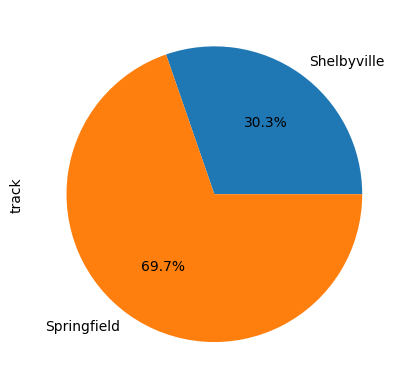

In [28]:
cua.plot(kind="pie", autopct='%1.1f%%')

 parece que en Springfield se escucha mas musica 

Ahora agrupemos los datos por día de la semana y encontremos el número de canciones reproducidas el lunes, miércoles y viernes. Utiliza el mismo método que antes, pero ahora necesitamos una agrupación diferente.


In [30]:
# Calcular las canciones reproducidas en cada uno de los tres días
dia = ["Monday", "Wednesday", "Friday"]
por_dia = df[df["day"].isin(dia)]
cal_por_dia = por_dia.groupby(by="day")["track"].count()
cal_por_dia



day
Friday       23149
Monday       22697
Wednesday    19233
Name: track, dtype: int64

<Axes: ylabel='track'>

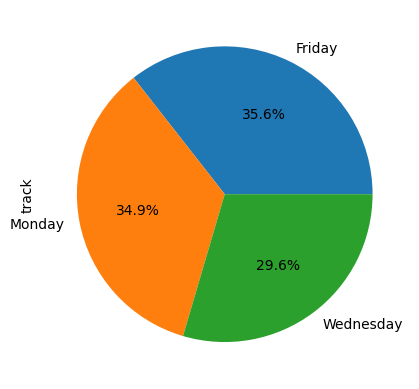

In [33]:
cal_por_dia.plot(kind="pie",autopct="%1.1f%%")

El día que más se escucha música es el viernes, muy similar al lunes y al miércoles. Este último es el más bajo, pero relativamente cercano. 

Ya sabes cómo contar entradas agrupándolas por ciudad o día. Ahora necesitas escribir una función que pueda contar entradas según ambos criterios simultáneamente.

Crea la función `number_tracks()` para calcular el número de canciones reproducidas en un determinado día **y** ciudad. La función debe aceptar dos parámetros:

- `day`: un día de la semana para filtrar. Por ejemplo, `'Monday'` (lunes).
- `city`: una ciudad para filtrar. Por ejemplo, `'Springfield'`.

Dentro de la función, aplicarás un filtrado consecutivo con indexación lógica.

Primero filtra los datos por día y luego filtra la tabla resultante por ciudad.

Después de filtrar los datos por dos criterios, cuenta el número de valores de la columna 'user_id' en la tabla resultante. Este recuento representa el número de entradas que estás buscando. Guarda el resultado en una nueva variable y devuélvelo desde la función.

In [34]:
# Declara la función number_tracks() con dos parámetros: day= y city=.
def number_tracks(day, city):
    
    # Almacena las filas del DataFrame donde el valor en la columna 'day' es igual al parámetro day=
    dia = df[df["day"]==day]

    # Filtra las filas donde el valor en la columna 'city' es igual al parámetro city=
    ciudad = dia[dia["city"]==city]

    # Extrae la columna 'user_id' de la tabla filtrada y aplica el método count()
    user = ciudad["user_id"].count()

    # Devolve el número de valores de la columna 'user_id'
    return user

Llama a `number_tracks()` seis veces, cambiando los valores de los parámetros para que recuperes los datos de ambas ciudades para cada uno de los tres días.

In [35]:
# El número de canciones reproducidas en Springfield el lunes
a1 = number_tracks("Monday","Springfield")
print(a1)

16715


In [36]:
# El número de canciones reproducidas en Shelbyville el lunes
a2 = number_tracks("Monday","Shelbyville")
print(a2)


5982


In [37]:
# El número de canciones reproducidas en Springfield el miércoles
a3 = number_tracks("Wednesday","Springfield")
print(a3)

11755


In [38]:
# El número de canciones reproducidas en Shelbyville el miércoles
a4 = number_tracks("Wednesday","Shelbyville")
print(a4)

7478


In [39]:
# El número de canciones reproducidas en Springfield el viernes
a5 = number_tracks("Friday","Springfield")
print(a5)

16890


In [40]:
# El número de canciones reproducidas en Shelbyville el viernes
a6 = number_tracks("Friday","Shelbyville")
print(a6)

6259


**Conclusiones**

si ya que si distintos el numero de canciones segun el dia de la semana 

# Conclusiones <a id='end'></a>

la hiportesis es verdadera 

### Nota
En proyectos de investigación reales, la prueba de hipótesis estadística es más precisa y cuantitativa. También ten en cuenta que no siempre se pueden sacar conclusiones sobre una ciudad entera a partir de datos de una sola fuente.

Aprenderás más sobre la prueba de hipótesis en el sprint de análisis estadístico de datos.